# Optimizing MCX Gates, Preparing for Future Hardware Today

This tutorial describes how to use the Classiq platform to create MCX gates, including one with 14 controls. Then, it demonstrates a much more complex example with 50 control qubits.

## Quantum Resources Are Valuable, Yet Limited

Quantum computers offer tantalizing promises to those who can harness their power. And although today’s computers are not quite able to solve real-world problems, those who are able to optimize for the available hardware can reap rewards sooner than those who wait. The MCX gate is an important quantum gate used in a variety of circuits, such as the Grover operator, logical AND operator, state preparation algorithms, and arithmetic comparators. The ability to adapt implementations of MCX gates to meet the hardware constraints—limited qubit count, fidelities, gate count, and so on—is not trivial.

## Creating a 14-Control MCX Gate with Classiq

To create an MCX gate with 14 control qubits using Classiq, we first define a quantum function called `my_mcx` whose arguments are an array of qubits (of any size) for `control` and a single qubit argument for the `target`:

In [1]:
from math import pi

from classiq import *

In [2]:
@qfunc
def my_mcx(cntrl: QArray, target: QBit) -> None:
    control(cntrl, lambda: X(target))

To create an MCX gate with 14 control qubits, we create a quantum `main` function that executes our `my_mcx` function with 14 qubits allocated to the `control` argument: 

In [3]:
@qfunc
def main(cntrl: Output[QArray], target: Output[QBit]) -> None:
    allocate(14, cntrl)
    allocate(target)
    my_mcx(cntrl, target)


write_qmod(main, "mcx_14_ctrl_depth")

To constrain a circuit to only 20 qubits and optimize for circuit depth, we pass the maximum width and optimization parameter to a `Constraints` object and synthesize our model, create a quantum program, and view it: 

In [4]:
MAX_WIDTH_1 = 20
constraints_1 = Constraints(
    max_width=MAX_WIDTH_1, optimization_parameter=OptimizationParameter.DEPTH
)
qprog_1 = synthesize(main, constraints=constraints_1)
write_qmod(main, "mcx_14_ctrl_depth")
show(qprog_1)

Quantum program link: https://platform.classiq.io/circuit/31s7JrRZWYNAeLtLEUrHCxXO4YG


Additionally, to get the transpiled circuit from our `qprog` object and print its depth: 

In [5]:
print(f"Synthesized MCX depth is {qprog_1.transpiled_circuit.depth}")

Synthesized MCX depth is 94


## Optimizing MCX for Every Occasion

Classiq automatically optimizes the quantum circuit and each MCX gate to a plethora of possible situations. To characterize each setting we pass our constraints and preferences to the synthesis request using the `Constraints` and `Preferences` objects.

### For Different Hardware

In [6]:
MAX_WIDTH_2 = 21

constraints_2 = Constraints(
    max_width=MAX_WIDTH_2, optimization_parameter=OptimizationParameter.DEPTH
)
preferences_2 = Preferences(
    backend_service_provider="IBM Quantum", backend_name="ibm_brisbane"
)


qprog_2 = synthesize(main, constraints=constraints_2, preferences=preferences_2)
write_qmod(main, "mcx_14_ctrl_hardware")
print(f"Synthesized MCX depth is {qprog_2.transpiled_circuit.depth}")
show(qprog_2)

Synthesized MCX depth is 271
Quantum program link: https://platform.classiq.io/circuit/31s7KotFMIZjxx3juBOv79YSLsT


### For CX Gates

In [7]:
MAX_WIDTH_3 = 19

constraints_3 = Constraints(max_width=MAX_WIDTH_3, optimization_parameter="cx")
preferences_3 = Preferences(
    custom_hardware_settings=CustomHardwareSettings(basis_gates=["cx", "u"])
)

qprog_3 = synthesize(main, constraints=constraints_3, preferences=preferences_3)
write_qmod(main, "mcx_14_ctrl_cx")
print(f"Synthesized MCX cx-count is {qprog_3.transpiled_circuit.count_ops['cx']}")
show(qprog_3)

Synthesized MCX cx-count is 168
Quantum program link: https://platform.classiq.io/circuit/31s7M6am6IJ7wZmDVRu37xNFyZt


## Beyond 14 Controls

The power of the Classiq synthesis engine is far greater than creating optimized, 14-control MCX gates in an instant. For example, the following code creates an MCX gate with 50 control qubits:

In [8]:
@qfunc
def main(cntrl: Output[QArray], target: Output[QBit]) -> None:
    allocate(50, cntrl)
    allocate(target)
    my_mcx(cntrl, target)


constraints_4 = Constraints(max_depth=1000)
preferences_4 = Preferences(optimization_level=0)
qprog_4 = synthesize(main, constraints=constraints_4, preferences=preferences_4)
write_qmod(main, "mcx_50_ctrl")
show(qprog_4)

Quantum program link: https://platform.classiq.io/circuit/31s7uF4G5NptT3aWBiBdWKmRGHj


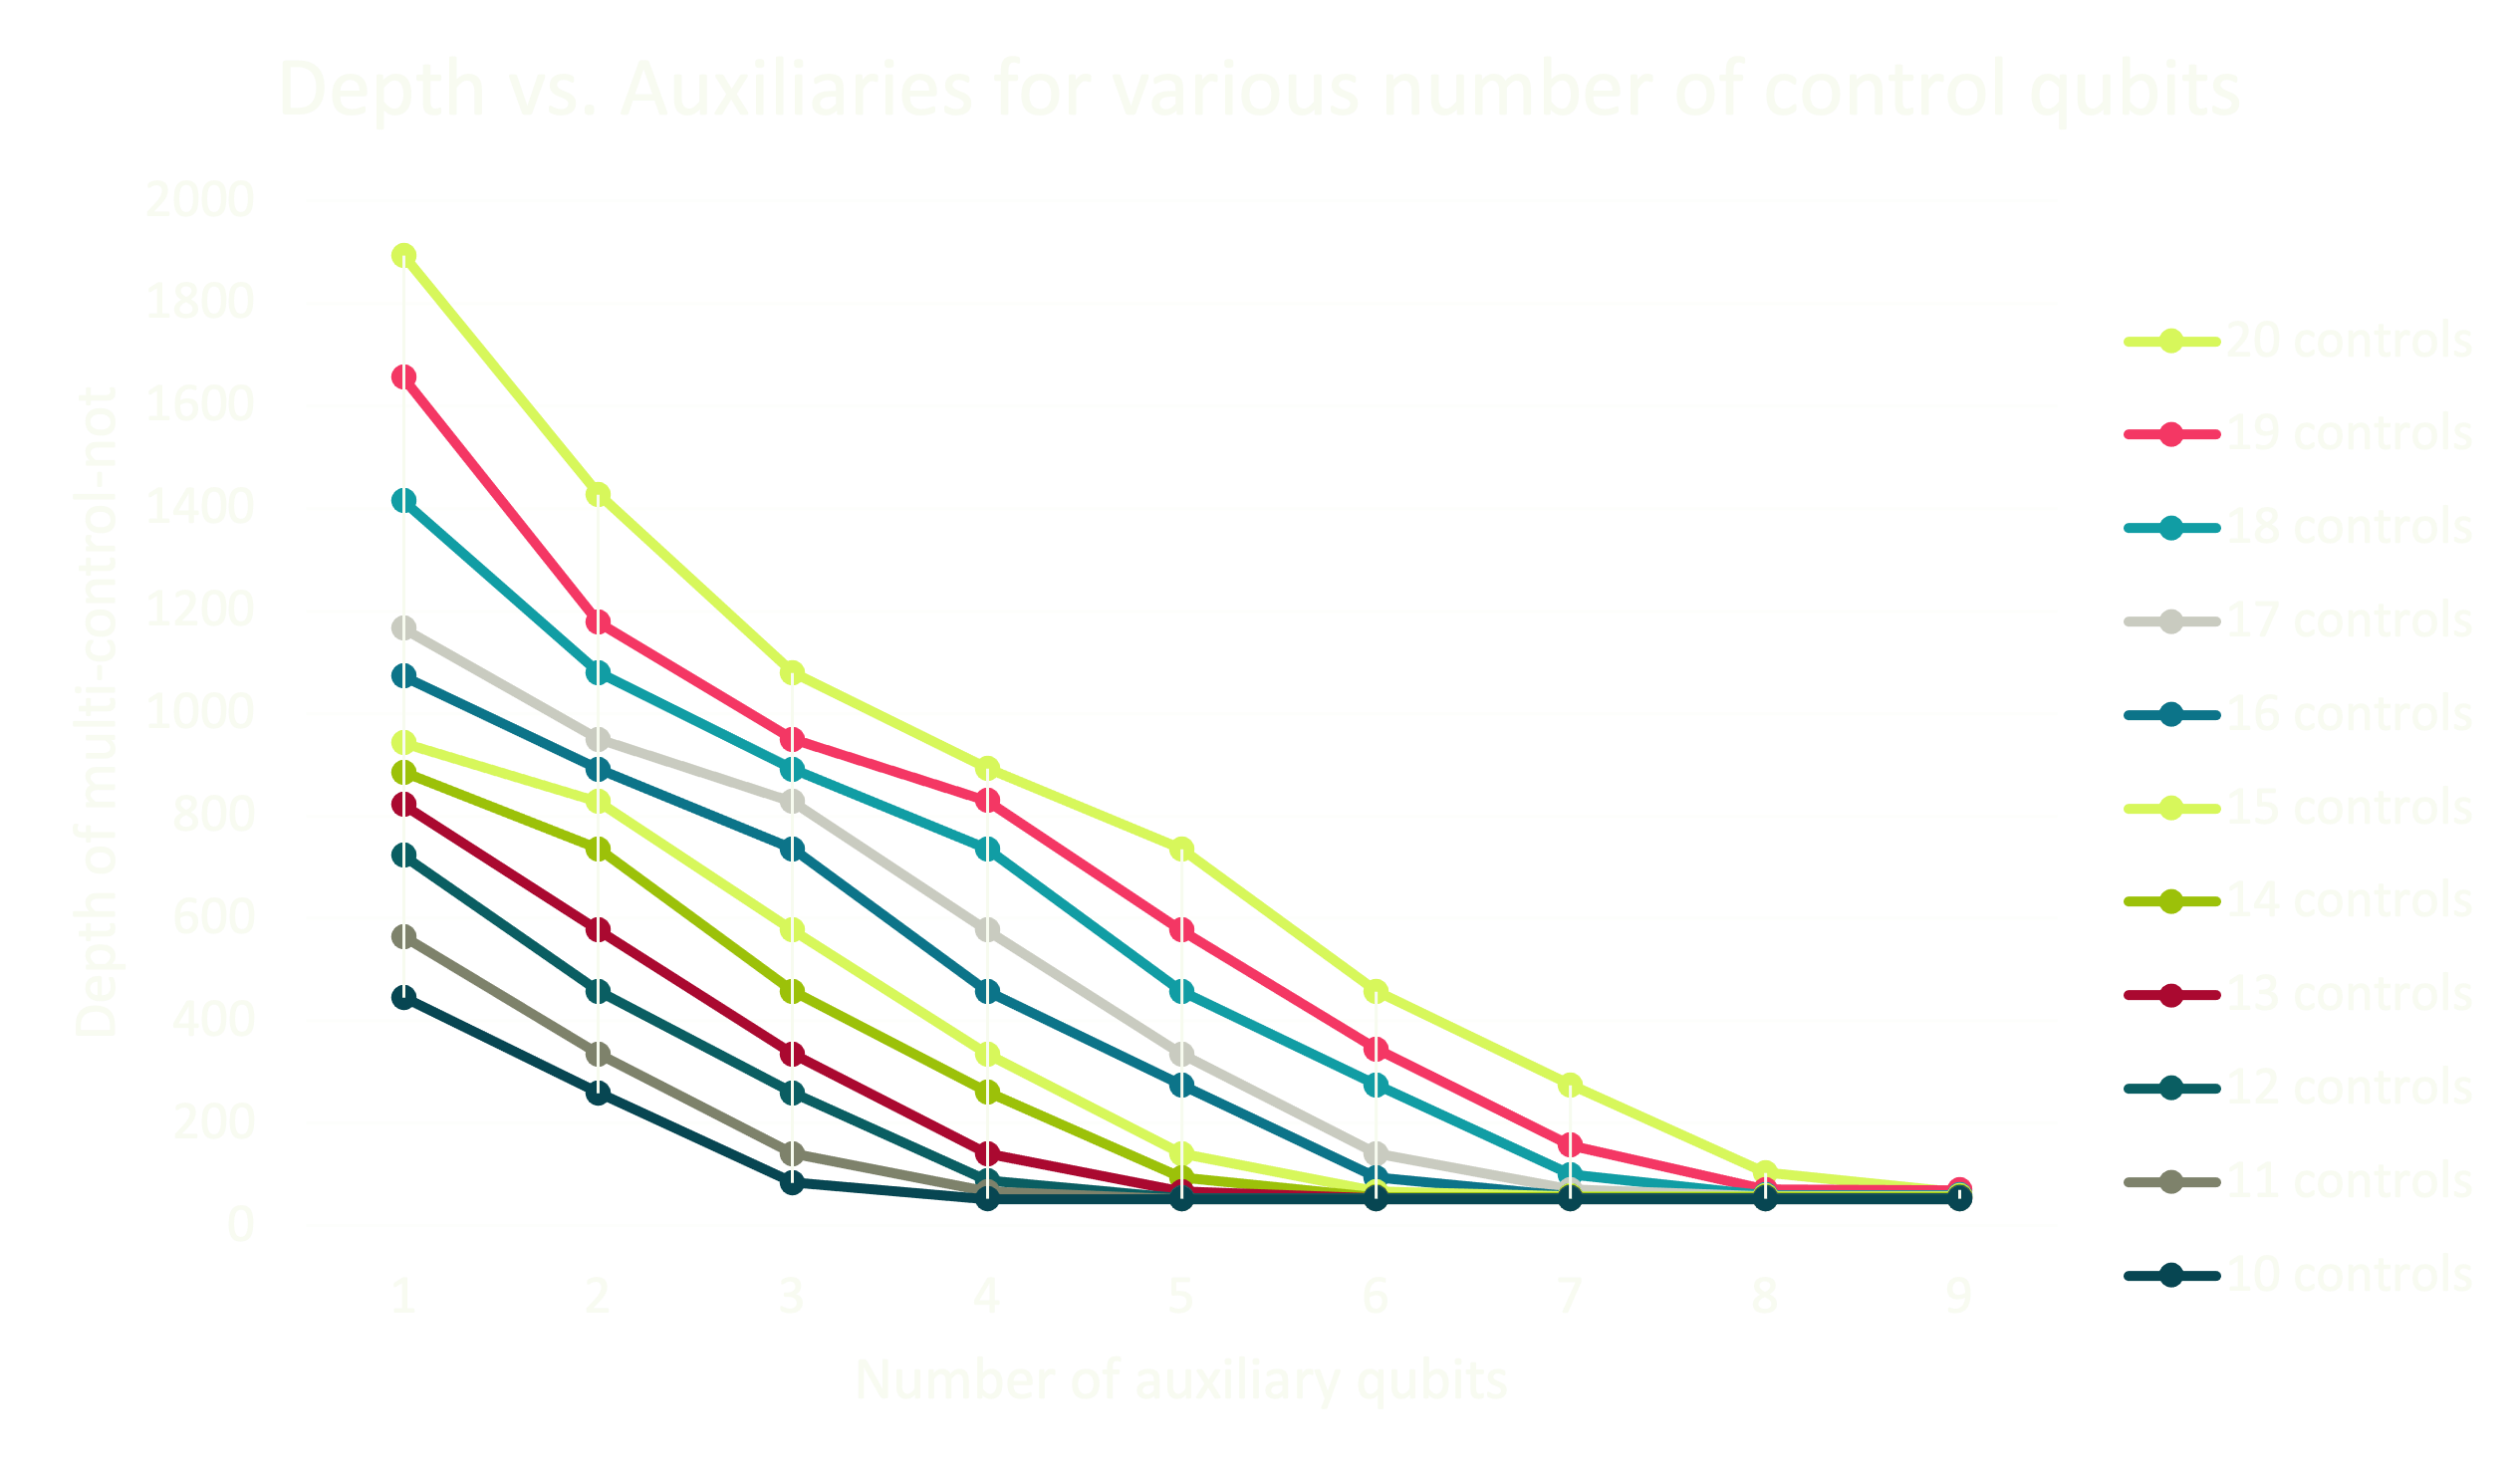